###	아래 함수 f(x)를 x=0에서 x의 다항식으로 표현하고 그래프로 그려보아라.   
### $$ f(x) = \cos⁡(2x) $$

In [7]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
f = sp.cos(2*x)

# 테일러 급수 전개 (x=0에서 8차항까지)
f.series(x, 0, 9)

1 - 2*x**2 + 2*x**4/3 - 4*x**6/45 + 2*x**8/315 + O(x**9)

In [8]:
# O() 이하 제거
f.series(x, 0, 9).removeO()

2*x**8/315 - 4*x**6/45 + 2*x**4/3 - 2*x**2 + 1

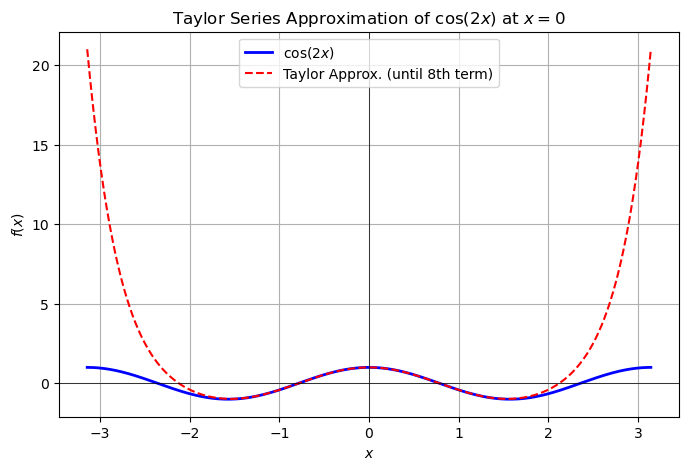

In [6]:
# 수치적으로 계산하여 그래프 그리기
import numpy as np 
import matplotlib.pyplot as plt 

# x 값 설정 (-π to π)
x_vals = np.linspace(-np.pi, np.pi, 400)
f_vals = np.cos(2 * x_vals)  # 원래 함수 값
taylor_func = sp.lambdify(x, taylor_series, 'numpy')  # 테일러 다항식 변환
taylor_vals = taylor_func(x_vals)  # 테일러 다항식 값

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label=r'$\cos(2x)$', linewidth=2, color='blue')
plt.plot(x_vals, taylor_vals, label='Taylor Approx. (until 8th term)', 
         linestyle='dashed', color='red')

# 그래프 설정
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title(r'Taylor Series Approximation of $\cos(2x)$ at $x=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid(True)

# 그래프 출력
plt.show()

###	테일러급수를 이용하여 아래 오일러 공식(Euler’s Formula)을 증명하여라
### $$ e^{iθ} = \cos⁡(θ)+i \sin⁡(θ) $$

In [6]:
from sympy import symbols, I, exp, cos, sin

# cos 함수의 테일러 급수
theta=symbols('θ')
f_cos=cos(theta).series(theta,0)
f_cos

1 - θ**2/2 + θ**4/24 + O(θ**6)

In [7]:
# sin 함수의 테일러 급수
f_sin=sin(theta).series(theta,0)
f_sin

θ - θ**3/6 + θ**5/120 + O(θ**6)

In [9]:
# exp 함수의 테일러 급수
f_exp=exp(theta*I).series(theta,0)
f_exp

1 + I*θ - θ**2/2 - I*θ**3/6 + θ**4/24 + I*θ**5/120 + O(θ**6)

In [10]:
f_exp-(f_cos+I*f_sin).simplify()

O(θ**6)

In [11]:
# 미분방정식을 이용한 증명
from sympy import diff
z=cos(theta)+I*sin(theta)
diff(z,theta)

-sin(θ) + I*cos(θ)

In [13]:
# 변수 및 함수 정의
from sympy import Function,Eq,dsolve
theta=symbols('θ')
z=Function('z')(theta)

# 미분방정식 정의
eq=Eq(z.diff(theta)-I*z,0)

# 초기조건
IC={z.subs(theta,0):1}

# 해구하기
dsolve(eq,z,ics=IC)

Eq(z(θ), exp(I*θ))